In [18]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import utils as u

- Which music styles are present in the collection? Plot distribution. 
- - As the model predictions are activations, you need to decide what you consider as the final music style prediction for a track. If you want to consider the possibility of multiple styles per track, define some threshold for activation values. Otherwise, if you want to have a single music style per track, use the one with the maximum activation.
- - We have 400 values which may be a challenge to fit in a compact plot. Predicted styles have a parent broad genre category (all style tags have a format `genre—style`). Therefore you can instead report distribution for parent broad genres. In any case, also provide full results as a separate TSV file (similar to how we report genre distribution in MTG-Jamendo).


In [50]:
# TODO: compute and plot genre distribution
pickle_file_path = 'descriptors/discogs-400-genre.pkl'

discogs_df = u.read_pickle_descriptors(pickle_file_path)
discogs_df.head(5)


,file_path,Blues---Boogie Woogie,Blues---Chicago Blues,Blues---Country Blues,Blues---Delta Blues,Blues---Electric Blues,Blues---Harmonica Blues,Blues---Jump Blues,Blues---Louisiana Blues,Blues---Modern Electric Blues,...,Rock---Symphonic Rock,Rock---Technical Death Metal,Rock---Thrash,Rock---Twist,Rock---Viking Metal,Rock---Yé-Yé,Stage & Screen---Musical,Stage & Screen---Score,Stage & Screen---Soundtrack,Stage & Screen---Theme
0,audio/audio/audio.002/7D/7DyRfspnGYcUhCAMcCys2...,4.451908e-06,3.228681e-05,6.951516e-05,1.953550e-05,0.000050,4.157957e-05,4.013963e-06,4.964849e-05,0.000529,...,0.000093,9.090259e-06,0.000018,0.000007,0.000058,0.000022,0.000179,0.000245,0.001781,0.000303
1,audio/audio/audio.002/1p/1pCHi3zHca7jgR27Sfu7L...,4.278032e-07,2.946841e-06,3.044410e-05,3.886121e-05,0.000007,1.103533e-05,1.047089e-06,2.279152e-05,0.000012,...,0.010203,6.146311e-04,0.000365,0.000002,0.002533,0.000075,0.000864,0.004735,0.008591,0.002386
2,audio/audio/audio.002/6o/6oOqQg46N239sc5Ev3THO...,3.872560e-07,2.697904e-07,1.327175e-07,4.309202e-07,0.000001,5.664926e-07,1.016157e-07,8.969807e-08,0.000002,...,0.000025,9.738255e-08,0.000009,0.000004,0.000001,0.000004,0.000020,0.000177,0.000767,0.000037
3,audio/audio/audio.002/0V/0VjJm2ufYkgLgoPhJriQe...,1.759596e-04,1.088045e-03,3.296832e-04,5.068047e-04,0.000650,2.711314e-04,1.622999e-04,3.108724e-03,0.002035,...,0.004110,5.613072e-07,0.000009,0.000070,0.000021,0.000012,0.004603,0.002114,0.012743,0.013516
4,audio/audio/audio.002/2J/2JWEsdT3tEsebXCBVfXNZ...,1.770138e-04,2.896588e-04,5.513771e-04,4.766285e-04,0.001318,4.399267e-04,1.103653e-04,8.725476e-04,0.001820,...,0.012517,2.429027e-05,0.000081,0.000173,0.000288,0.000474,0.020121,0.007169,0.010622,0.005165


In [20]:
pickle_file_path = 'descriptors/descriptors-but-genre.pkl'


descriptors_df = u.read_pickle_descriptors(pickle_file_path)
descriptors_df.head(5)

,file_path,loudness,tempo,voice_instrumental,danceability,arousal_valence,keyscale_edma,keyscale_krumhansl,keyscale_temperly
0,audio/audio/audio.002/7D/7DyRfspnGYcUhCAMcCys2...,-8.753432,103,"[0.15253224968910217, 0.8474678993225098]","[0.9917839765548706, 0.008216017857193947]","[5.47484827041626, 5.619569301605225]","(C, major, 0.7261785268783569)","(C, major, 0.6944931149482727)","(F, minor, 0.6367504596710205)"
1,audio/audio/audio.002/1p/1pCHi3zHca7jgR27Sfu7L...,-7.172849,110,"[0.18301650881767273, 0.8169834017753601]","[0.41703659296035767, 0.5829633474349976]","[4.977231025695801, 5.848262310028076]","(F#, major, 0.7622326016426086)","(C#, minor, 0.7277114987373352)","(C#, minor, 0.637634813785553)"
2,audio/audio/audio.002/6o/6oOqQg46N239sc5Ev3THO...,-14.508702,120,"[0.007020066492259502, 0.9929799437522888]","[0.9999699592590332, 2.9990658731549047e-05]","[5.468522071838379, 5.029833793640137]","(Ab, minor, 0.6279099583625793)","(Ab, minor, 0.7639158964157104)","(B, major, 0.6315133571624756)"
3,audio/audio/audio.002/0V/0VjJm2ufYkgLgoPhJriQe...,-15.327171,133,"[0.34557825326919556, 0.6544217467308044]","[0.5520269274711609, 0.44797295331954956]","[4.859508037567139, 4.811494827270508]","(Bb, minor, 0.6386500000953674)","(Bb, minor, 0.6947032809257507)","(Bb, minor, 0.7300366759300232)"
4,audio/audio/audio.002/2J/2JWEsdT3tEsebXCBVfXNZ...,-9.145512,133,"[0.024056706577539444, 0.975943386554718]","[0.04478800669312477, 0.9552121162414551]","[5.331084728240967, 5.79698371887207]","(Ab, major, 0.6811672449111938)","(Ab, major, 0.6532479524612427)","(C#, major, 0.6620874404907227)"


- How fast and danceable is the music? Plot tempo and danceability distribution.


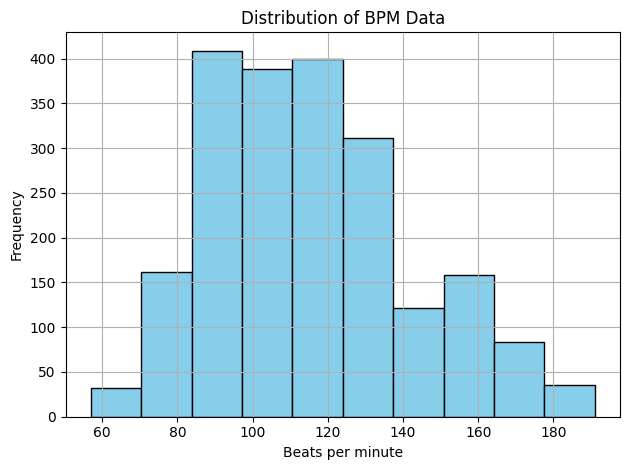

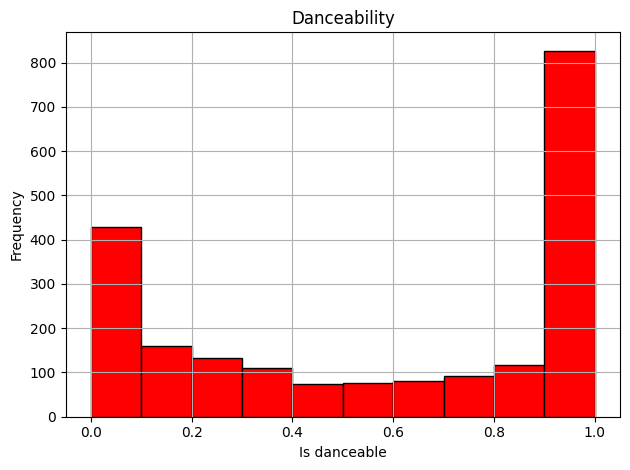

In [21]:

plt.hist(descriptors_df['tempo'], color='skyblue', edgecolor='black')
plt.title('Distribution of BPM Data')
plt.xlabel('Beats per minute')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# TODO: whats wrong with danceability distribution?
plt.hist(descriptors_df['danceability'].apply(lambda x: x[0]), color='red', edgecolor='black')
plt.title('Danceability')
plt.xlabel('Is danceable')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

- How is music represented in terms of arousal/valence emotion space? Plot a 2D distribution.


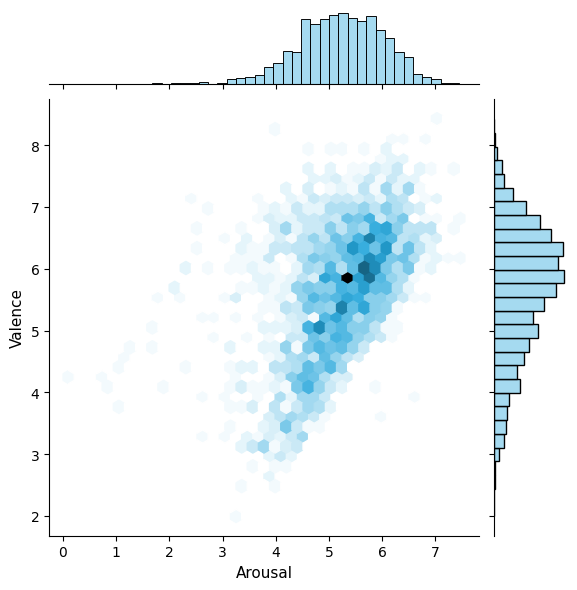

In [22]:
arousal = descriptors_df['arousal_valence'].apply(lambda x: x[0])
valence = descriptors_df['arousal_valence'].apply(lambda x: x[1])
joint_plot = sns.jointplot(x=arousal, y=valence, kind='hex', color='skyblue')
joint_plot.set_axis_labels('Arousal', 'Valence', fontsize=11)
plt.show()

- What about loudness? Plot integrated loudness LUFS distribution.


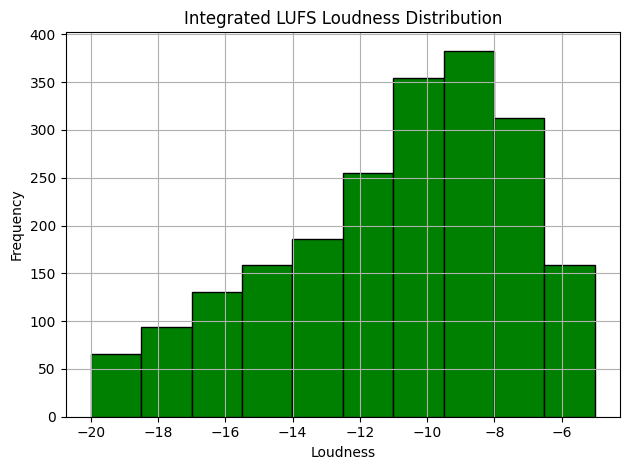

In [23]:
plt.hist(descriptors_df['loudness'], color='green', edgecolor='black')
plt.title('Integrated LUFS Loudness Distribution')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

- Which keys/scales are used in the collection? Plot distribution according to the three profiles we used.
- How much of the music is vocal vs instrumental? 


In [24]:
# TODO: key scale and vocal vs instrumental